In [1]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [3]:
Qs = []
Rs = []
sRs = []
sQs = []

for i in range(len(env.Ts.T)):
    U = getattr(env, 'T_' + str(int(env.Ts.T[i].item()))).U
    I = getattr(env, 'T_' + str(int(env.Ts.T[i].item()))).I
    
    
    Qs.append(U * I)
    Rs.append(U / I)
    sR_, sQ_ = env.get_err_bars(Rs[-1], Qs[-1])
    sRs.append(sR_)
    sQs.append(sQ_)
    env.chi2(Qs[-1], Rs[-1], {'a': f'R0{i + 1}', 'b': f'beta{i + 1}'}, auto_reverse=False)

C:\Users\andri\OneDrive\Desktop\mipt_edu\2sem\labs\lab1\process\gradient_errors.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


In [4]:
R0s = [env.R01, env.R02, env.R03, env.R04, env.R05, env.R06, env.R07]
betas = [env.beta1, env.beta2, env.beta3, env.beta4, env.beta5, env.beta6, env.beta7]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


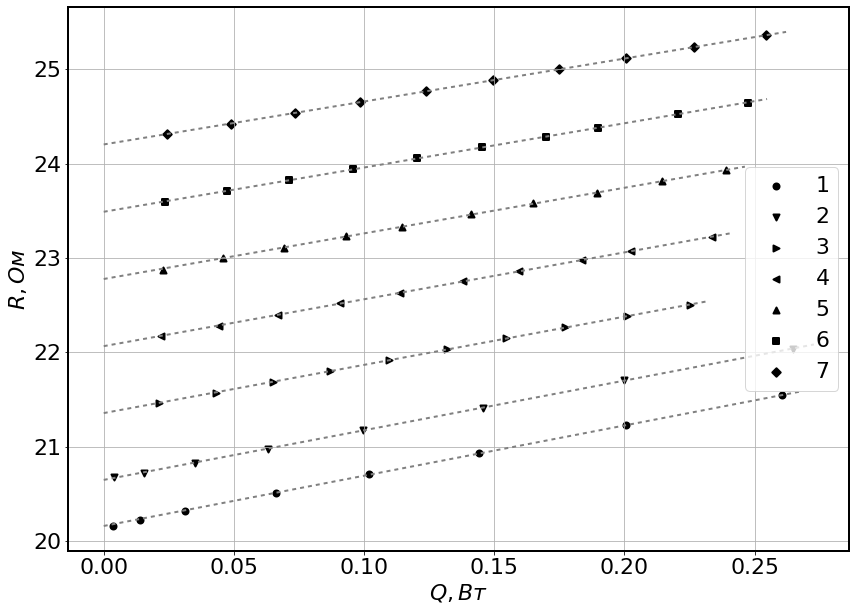

In [5]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

for i in range(7):
    Q, R, sQ, sR = Qs[i].detach().numpy(), Rs[i].detach().numpy(), sQs[i], sRs[i]

    ax.scatter(Q, R, linewidth=2, c='black', marker=markers[i], label=str(i+1))

    X = np.array([min(Q)*0, max(Q)*1.03])
    Y = R0s[i].item() + betas[i].item()*X
    
    ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
#     ax.errorbar(Q, R, xerr= sQ, yerr=sR, fmt='none', linewidth=2)

    ax.set_xlabel(r"$Q, Вт$")
    ax.set_ylabel(r"$R, Ом$")

ax.legend()
fig.savefig(r'../images/RQ.eps', format='eps')

In [6]:
sR0s, sTs = env.get_err_bars(R0s, env.Ts.T)
env.chi2(env.Ts.T, R0s, {'a': f'R0_abs', 'b': f'alpha'})

Using reversed axis


C:\Users\andri\OneDrive\Desktop\mipt_edu\2sem\labs\lab1\process\gradient_errors.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


(tensor(18.5169, dtype=torch.float64, requires_grad=True),
 tensor(0.0710, dtype=torch.float64, requires_grad=True))

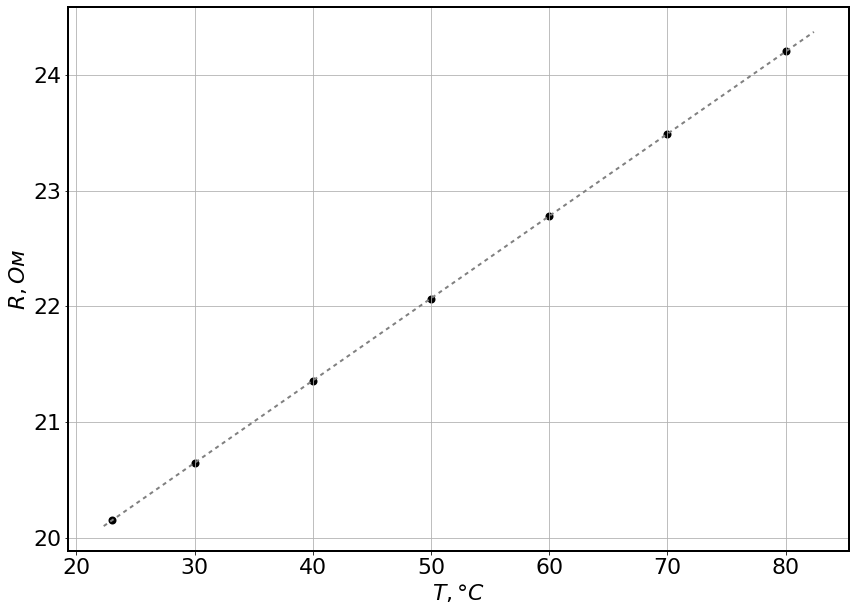

In [7]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

R, T = torch.tensor(R0s).detach().numpy(), env.Ts.T.detach().numpy()

ax.scatter(T, R, linewidth=2, c='black')

X = np.array([min(T)*0.97, max(T)*1.03])
Y = env.R0_abs.item() + env.alpha.item()*X

ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
# ax.errorbar(T, R, xerr = sTs, yerr = sR0s, fmt='none', linewidth=2)

ax.set_ylabel(r"$R, Ом$")
ax.set_xlabel(r"$T, °C$")
fig.savefig(r'../images/RT.eps', format='eps')

In [8]:
gammas = [env.alpha / beta for beta in betas]
kappas = [gamma / (2 * np.pi * env.L) * torch.log(env.d2/env.d1) for gamma in gammas]

In [9]:
for i, kappa in enumerate(kappas):
    env.show(kappa, name=f'kappa_{i+1}')

In [10]:
skappas, sTs = env.get_err_bars(kappas, env.Ts.T)
ln_kappas, ln_T = [torch.log(kappa) for kappa in kappas], torch.log(env.Ts.T + 273.3)

sln_kappas, sln_Ts = env.get_err_bars(ln_kappas, ln_T)
env.chi2(ln_T, ln_kappas, {'a': f'a_', 'b': f'n'})

ln_kappas, ln_T = torch.tensor(ln_kappas).detach().numpy(), ln_T.detach().numpy()
Kappa, T = torch.tensor(kappas).detach().numpy(), env.Ts.T.detach().numpy()

Using reversed axis


C:\Users\andri\OneDrive\Desktop\mipt_edu\2sem\labs\lab1\process\gradient_errors.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


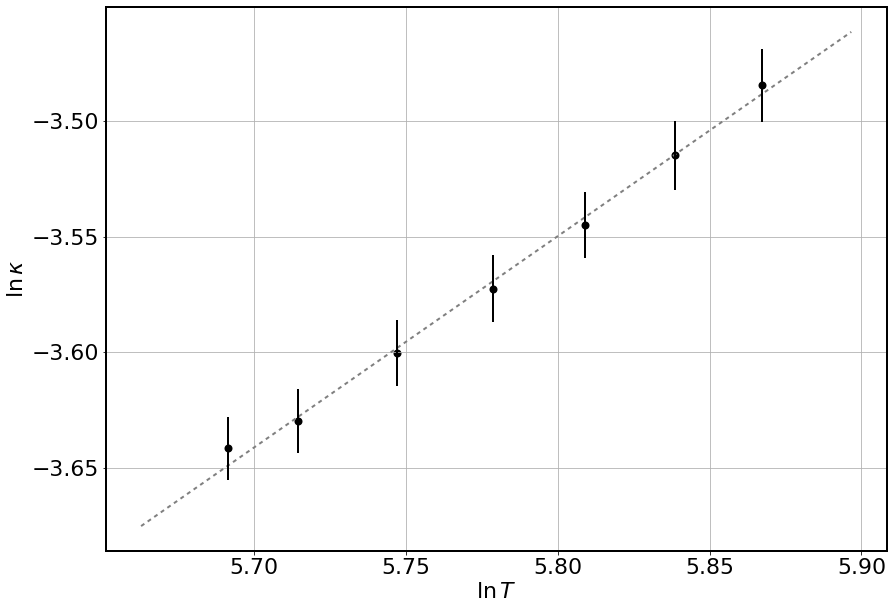

In [11]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(ln_T, ln_kappas, linewidth=2, c='black')

X = np.array([min(ln_T)*0.995, max(ln_T)*1.005])
Y = env.a_.item() + env.n.item()*X

ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
ax.errorbar(ln_T, ln_kappas, xerr = sln_Ts, yerr = sln_kappas, fmt='none', linewidth=2, c='black')

ax.set_ylabel(r"$\ln \kappa$")
ax.set_xlabel(r"$\ln T$")
fig.savefig(r'../images/lnkT.eps', format='eps')

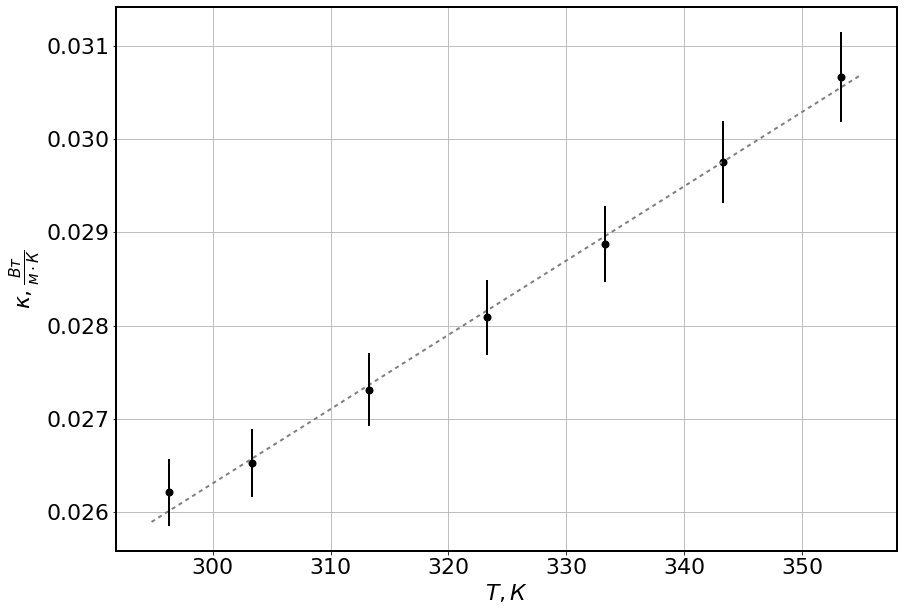

In [12]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(T + 273.3, Kappa, linewidth=2, c='black')

X = np.array([min(T + 273.3)*0.995, max(T + 273.3)*1.005])
Y = np.e**env.a_.item()*X**env.n.item()

ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
ax.errorbar(T + 273.3, Kappa, xerr = sTs, yerr = skappas, fmt='none', linewidth=2, c='black')

ax.set_ylabel(r"$\kappa, \frac{Вт}{м \cdot К}$")
ax.set_xlabel(r"$T, К$")
fig.savefig(r'../images/kT.eps', format='eps')

In [13]:
env.show(env.n, name='n')

('9.1', '0.3', -1)